In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
df=pd.read_csv('/content/Sales.csv')

In [ ]:
df.head()

,OrderID,Order_Date,CustomerID,Customer_Name,StockItemID,StockItem_Name,Quantity,UnitPrice,TaxRate,Line_Revenue,Tax_Amount,Transaction_Date
0,21600,2/7/2014,921,Victoria Lacusta,56,IT joke mug - hardware: part of the computer t...,1,13.0,15,13.0,1.95,5/15/2015
1,70564,4/16/2016,877,Leyla Siavashi,35,Developer joke mug - fun was unexpected at thi...,4,13.0,15,52.0,7.80,4/9/2014
2,63014,12/16/2015,401,Wingtip Toys (Head Office),63,RC toy sedan car with remote control (Pink) 1/...,4,25.0,15,100.0,15.00,6/10/2014
3,59445,10/20/2015,1,Tailspin Toys (Head Office),12,USB food flash drive - donut,10,32.0,15,320.0,48.00,1/26/2014
4,15906,10/25/2013,856,Satish Mittal,103,Alien officer hoodie (Black) XXL,8,35.0,15,280.0,42.00,8/6/2015


# EDA

In [ ]:
df.describe()

,OrderID,CustomerID,StockItemID,Quantity,UnitPrice,TaxRate,Line_Revenue,Tax_Amount
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,36214.615000,552.633500,110.579500,40.002000,45.414770,14.98250,762.019525,114.149029
std,20599.759665,384.434564,63.703664,52.764515,148.515846,0.29536,1415.242708,212.261349
min,148.000000,1.000000,1.000000,1.000000,0.660000,10.00000,13.000000,1.950000
25%,18665.000000,69.250000,54.000000,5.000000,13.000000,15.00000,104.000000,15.600000
50%,35992.000000,401.000000,110.500000,9.000000,18.000000,15.00000,245.000000,36.750000
75%,54157.250000,905.000000,165.000000,70.000000,32.000000,15.00000,960.000000,140.895000
max,73576.000000,1055.000000,227.000000,360.000000,1899.000000,15.00000,18990.000000,2848.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderID           2000 non-null   int64  
 1   Order_Date        2000 non-null   object 
 2   CustomerID        2000 non-null   int64  
 3   Customer_Name     2000 non-null   object 
 4   StockItemID       2000 non-null   int64  
 5   StockItem_Name    2000 non-null   object 
 6   Quantity          2000 non-null   int64  
 7   UnitPrice         2000 non-null   float64
 8   TaxRate           2000 non-null   int64  
 9   Line_Revenue      2000 non-null   float64
 10  Tax_Amount        2000 non-null   float64
 11  Transaction_Date  1994 non-null   object 
dtypes: float64(3), int64(5), object(4)
memory usage: 187.6+ KB


In [ ]:
df[['Customer', 'Location']] = df['Customer_Name'].str.extract(r'([^(]+)(?:\s?\(([^)]+)\))?')

In [ ]:
df['State'] = df['Location'].str.extract(r',\s*(\w{2})$')

In [ ]:
state_mapping = {
    'TX': 'Texas', 'MO': 'Missouri', 'SC': 'South Carolina', 'MN': 'Minnesota',
    'PA': 'Pennsylvania', 'WA': 'Washington', 'OK': 'Oklahoma', 'NY': 'New York',
    'AL': 'Alabama', 'VT': 'Vermont', 'SD': 'South Dakota', 'LA': 'Louisiana',
    'GA': 'Georgia', 'CA': 'California', 'Unknown': 'Unknown' }

In [ ]:
df['State'] = df['State'].map(state_mapping)

In [ ]:
df.isnull().sum()

,0
OrderID,0
Order_Date,0
CustomerID,0
Customer_Name,0
StockItemID,0
StockItem_Name,0
Quantity,0
UnitPrice,0
TaxRate,0
Line_Revenue,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(2000, 15)

In [ ]:
df

,OrderID,Order_Date,CustomerID,Customer_Name,StockItemID,StockItem_Name,Quantity,UnitPrice,TaxRate,Line_Revenue,Tax_Amount,Transaction_Date,Customer,Location,State
0,21600,2/7/2014,921,Victoria Lacusta,56,IT joke mug - hardware: part of the computer t...,1,13.0,15,13.0,1.95,5/15/2015,Victoria Lacusta,NaN,NaN
1,70564,4/16/2016,877,Leyla Siavashi,35,Developer joke mug - fun was unexpected at thi...,4,13.0,15,52.0,7.80,4/9/2014,Leyla Siavashi,NaN,NaN
2,63014,12/16/2015,401,Wingtip Toys (Head Office),63,RC toy sedan car with remote control (Pink) 1/...,4,25.0,15,100.0,15.00,6/10/2014,Wingtip Toys,Head Office,NaN
3,59445,10/20/2015,1,Tailspin Toys (Head Office),12,USB food flash drive - donut,10,32.0,15,320.0,48.00,1/26/2014,Tailspin Toys,Head Office,NaN
4,15906,10/25/2013,856,Satish Mittal,103,Alien officer hoodie (Black) XXL,8,35.0,15,280.0,42.00,8/6/2015,Satish Mittal,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,25307,4/17/2014,401,Wingtip Toys (Head Office),87,"""The Gu"" red shirt XML tag t-shirt (White) 6XL",108,18.0,15,1944.0,291.60,11/12/2015,Wingtip Toys,Head Office,NaN
1996,65109,1/18/2016,1,Tailspin Toys (Head Office),208,Permanent marker red 5mm nib (Red) 5mm,84,2.7,15,226.8,34.02,7/15/2013,Tailspin Toys,Head Office,NaN
1997,3482,3/12/2013,1,Tailspin Toys (Head Office),166,10 mm Anti static bubble wrap (Blue) 20m,50,42.0,15,2100.0,315.00,4/29/2014,Tailspin Toys,Head Office,NaN
1998,494,1/9/2013,401,Wingtip Toys (Head Office),216,Void fill 100 L bag (White) 100L,10,12.5,15,125.0,18.75,8/19/2014,Wingtip Toys,Head Office,NaN


# DATA CLEANING

In [ ]:
df['Location'] = df['Location'].fillna('Unknown')

In [ ]:
df['State'].fillna('Unknown', inplace=True)

<ipython-input-16-7c26ee4d15dd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['State'].fillna('Unknown', inplace=True)


# Time-Based Analysis

 Create Time-Based Columns


In [ ]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], errors='coerce')

In [ ]:
df['Order_Year'] = df['Order_Date'].dt.year
df['Order_Month'] = df['Order_Date'].dt.month_name()
df['Order_Weekday'] = df['Order_Date'].dt.day_name()

In [ ]:
df['Transaction_Year'] = df['Transaction_Date'].dt.year
df['Transaction_Month'] = df['Transaction_Date'].dt.month_name()
df['Transaction_Weekday'] = df['Transaction_Date'].dt.day_name()

In [ ]:
df["Days_Difference"] = (df["Transaction_Date"] - df["Order_Date"]).dt.days

df["Payment_Flag"] = df["Days_Difference"].apply(lambda x: "Prepayment" if x < 0 else "Postpayment")

In [ ]:
total_orders = len(df)
prepaid = df[df["Payment_Flag"] == "Prepayment"]
postpaid = df[df["Payment_Flag"] == "Postpayment"]

print(f"Total Orders: {total_orders}")
print(f"Prepaid Orders: {len(prepaid)} ({len(prepaid)/total_orders:.2%})")
print(f"Postpaid Orders: {len(postpaid)} ({len(postpaid)/total_orders:.2%})")
print(f"Average Days Difference: {df['Days_Difference'].mean():.2f} days")

Total Orders: 2000
Prepaid Orders: 1002 (50.10%)
Postpaid Orders: 998 (49.90%)
Average Days Difference: -10.87 days


<ipython-input-79-d0af8785b759>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Customer_Type", palette="coolwarm")


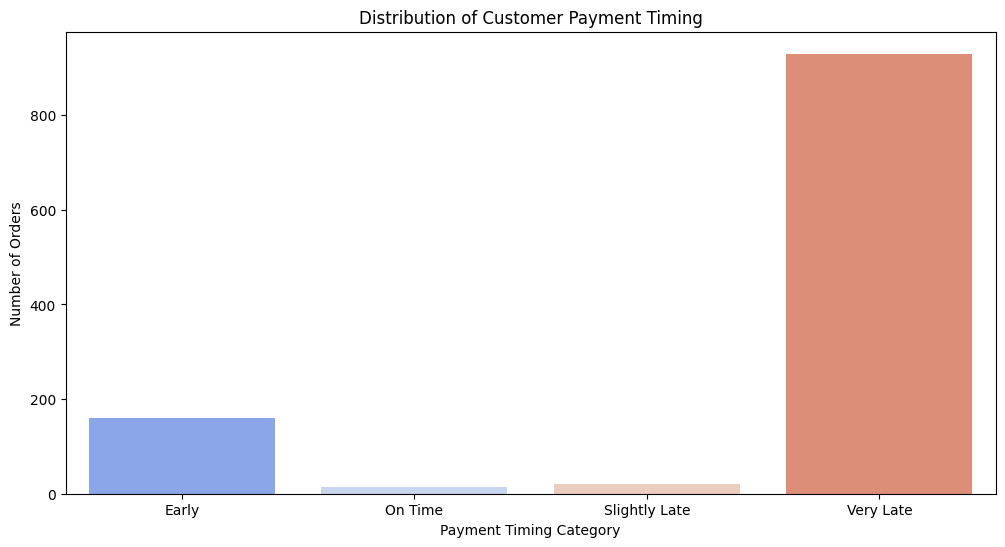

In [ ]:
df["Customer_Type"] = pd.cut(
    df["Days_Difference"],
    bins=[-100, -1, 2, 15, 1000],
    labels=["Early", "On Time", "Slightly Late", "Very Late"]
)

sns.countplot(data=df, x="Customer_Type", palette="coolwarm")
plt.title("Distribution of Customer Payment Timing")
plt.ylabel("Number of Orders")
plt.xlabel("Payment Timing Category")
plt.show()


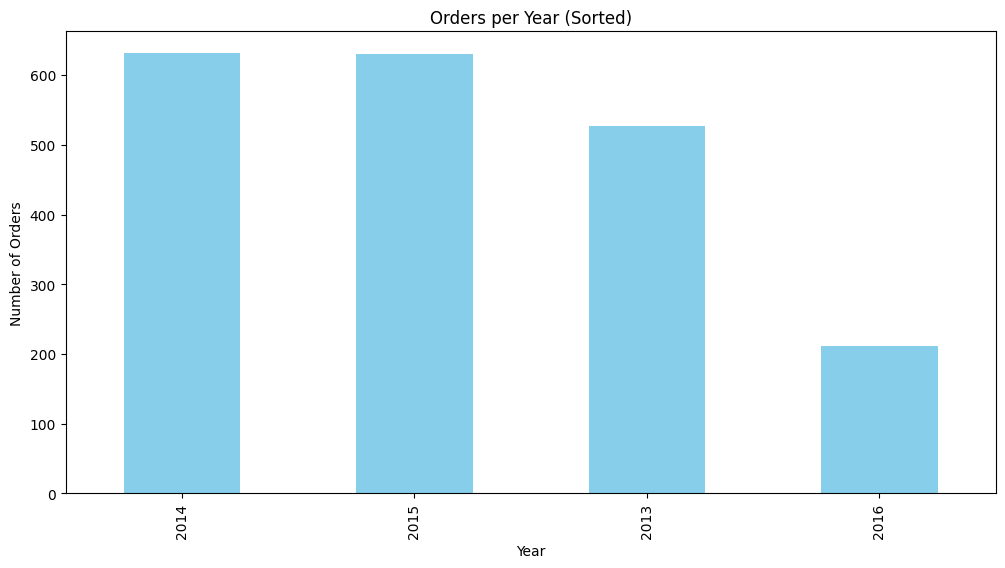

In [ ]:
orders_per_year = df.groupby('Order_Year')['OrderID'].count().sort_values(ascending=False)

orders_per_year.plot(kind='bar', title='Orders per Year (Sorted)', color='skyblue')
plt.ylabel('Number of Orders')
plt.xlabel('Year')
plt.show()


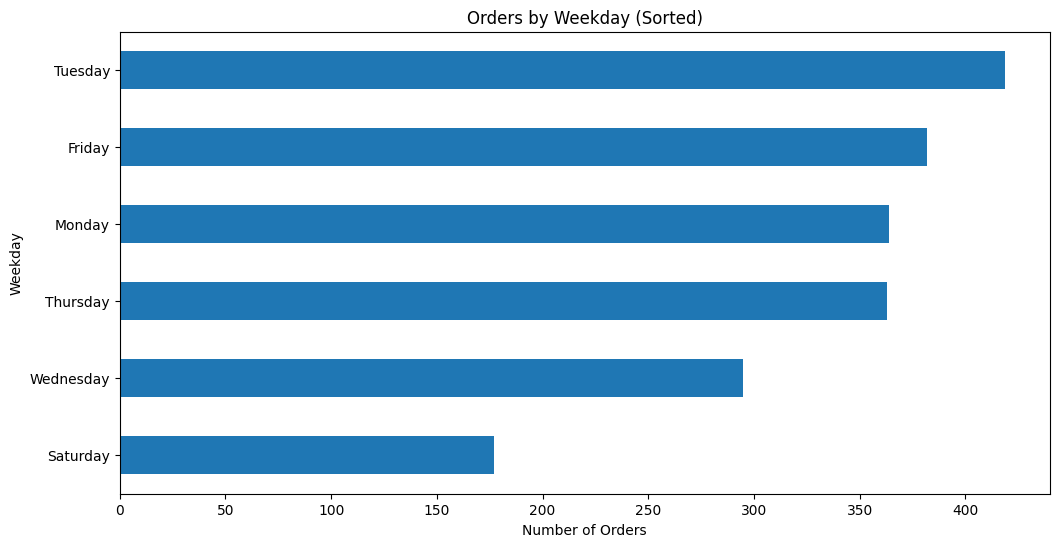

In [ ]:
weekday_orders = df['Order_Weekday'].value_counts().sort_values(ascending=True)  # ascending=True for barh

weekday_orders.plot(kind='barh', title='Orders by Weekday (Sorted)')
plt.xlabel('Number of Orders')
plt.ylabel('Weekday')
plt.show()


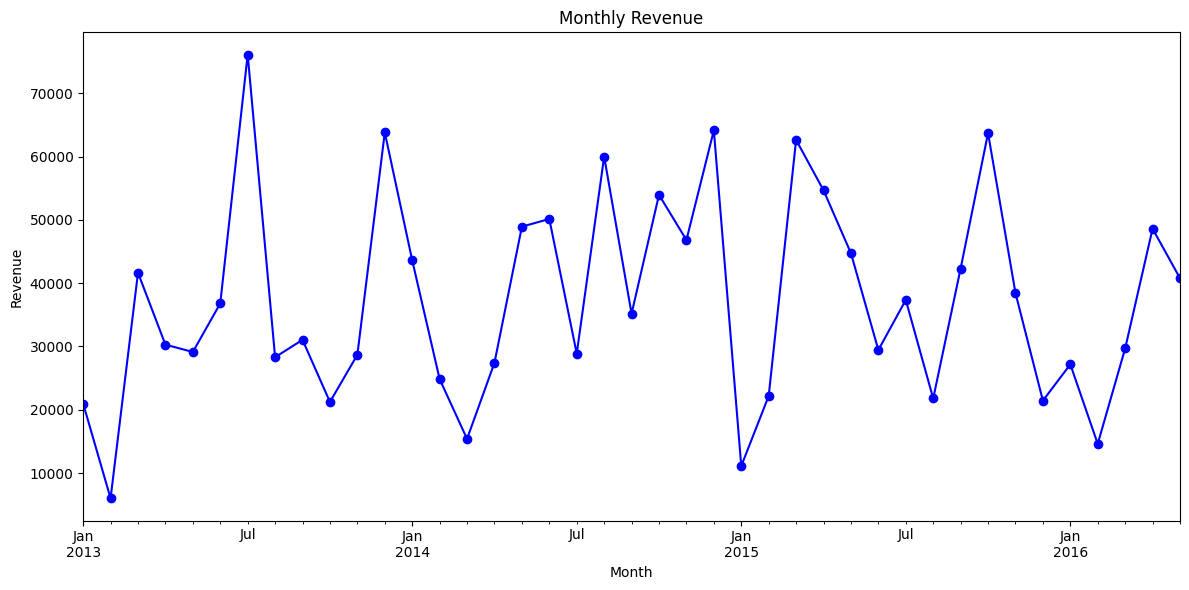

In [ ]:
monthly_revenue = df.groupby(df['Order_Date'].dt.to_period('M'))['Line_Revenue'].sum()
monthly_revenue.plot(title='Monthly Revenue', figsize=(12, 6), marker='o', color='b')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

# *revenue analysis*

Total Revenue

In [ ]:
total_revenue = df['Line_Revenue'].sum()

In [ ]:
print(f"Total Revenue: ${total_revenue:,.2f}")

Total Revenue: $1,524,039.05


Top 10 Products by Sales

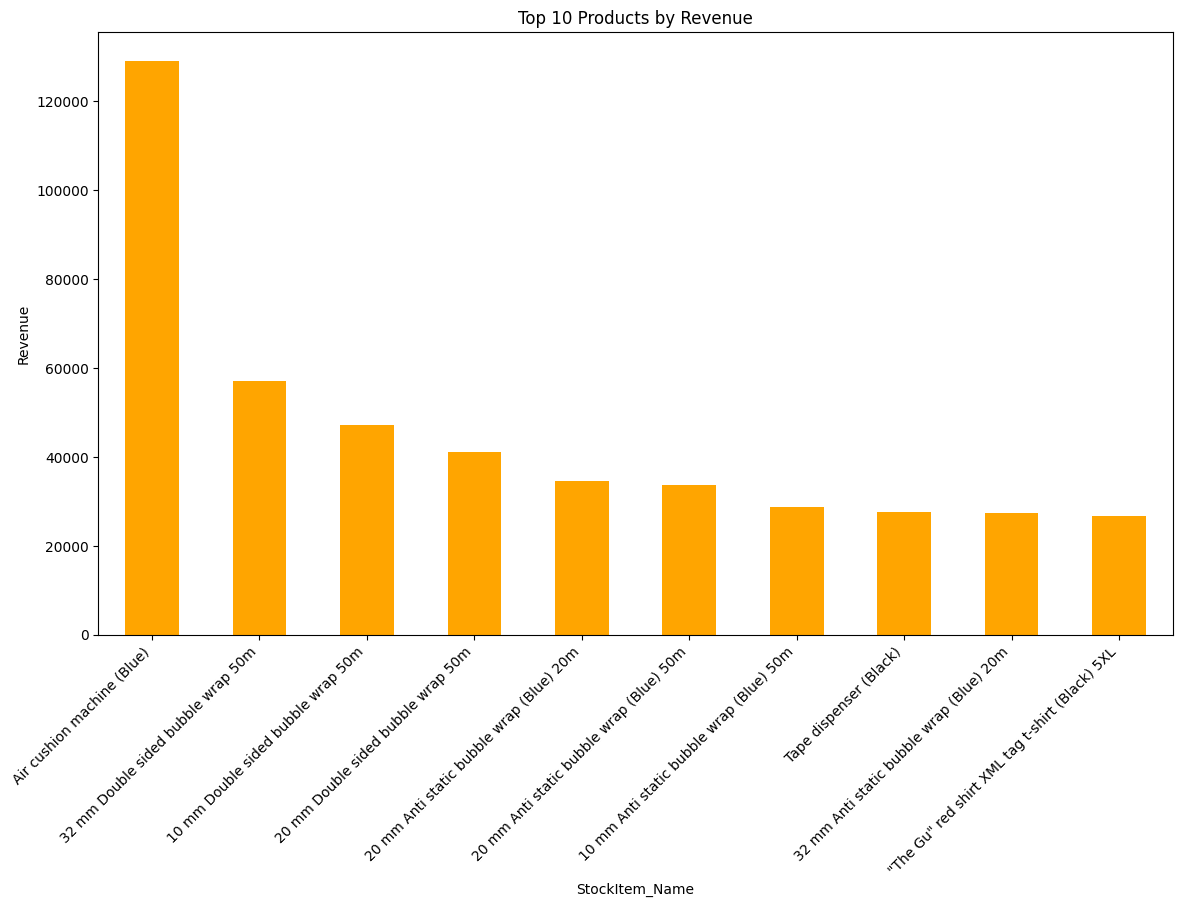

In [ ]:
top_revenue_products = df.groupby('StockItem_Name')['Line_Revenue'].sum().sort_values(ascending=False).head(10)
fig, ax = plt.subplots(figsize=(12, 8))
top_revenue_products.plot(kind='bar', title='Top 10 Products by Revenue', color='orange', ax=ax)
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()


Most Sold Products (by Quantity)

In [ ]:
top_products = df.groupby('StockItem_Name')['Quantity'].sum().sort_values(ascending=False).head(10)

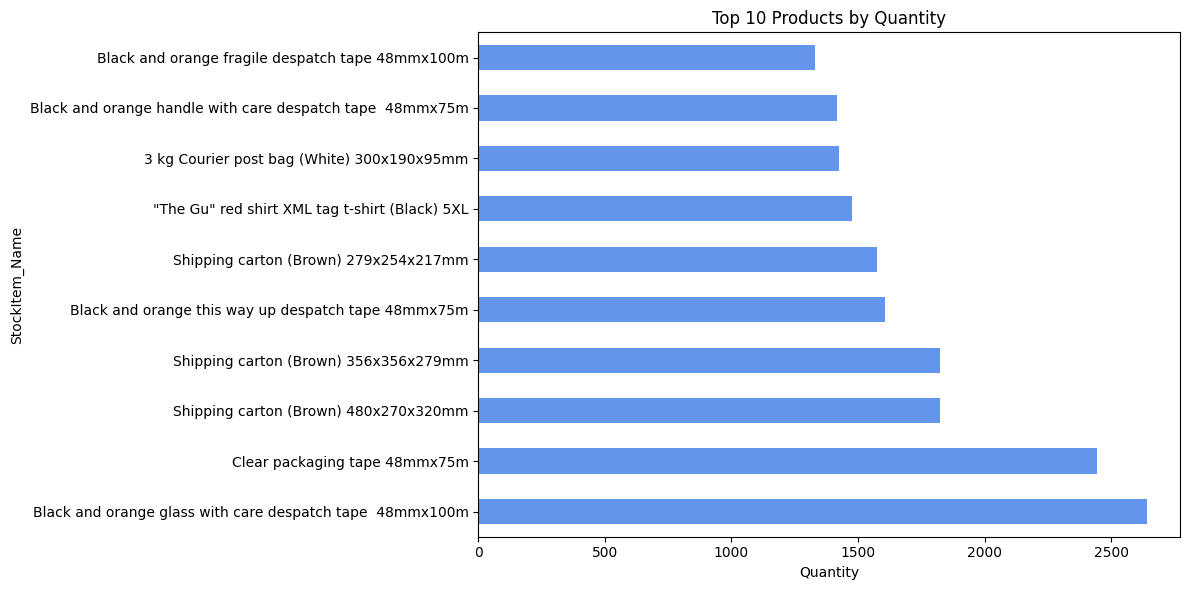

In [ ]:
top_products.plot(kind='barh', title='Top 10 Products by Quantity', color='cornflowerblue')
plt.xlabel('Quantity')
plt.tight_layout()
plt.show()

Top 10 Most Expensive Items

In [ ]:
avg_prices = df.groupby('StockItem_Name')['UnitPrice'].mean().reset_index()

In [ ]:
top_10_expensive = avg_prices.sort_values(by='UnitPrice', ascending=False).head(10)

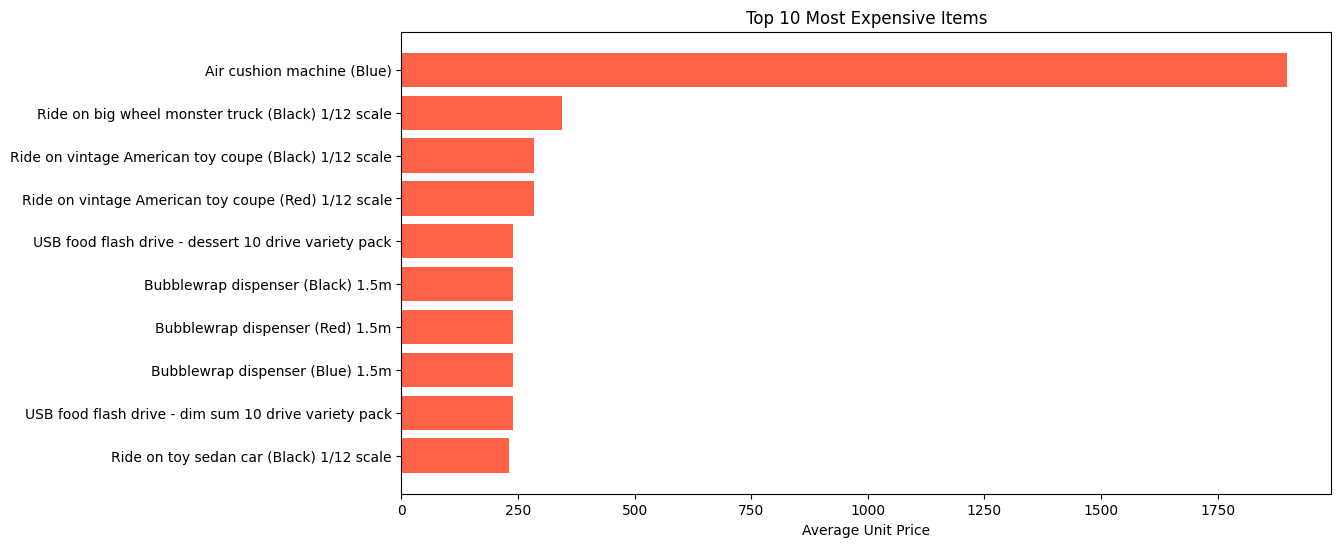

In [ ]:
plt.barh(top_10_expensive['StockItem_Name'], top_10_expensive['UnitPrice'], color='tomato')
plt.title('Top 10 Most Expensive Items')
plt.xlabel('Average Unit Price')
plt.gca().invert_yaxis()

Top 10 Cheapest Items

In [ ]:
top_10_cheap = avg_prices.sort_values(by='UnitPrice', ascending=True).head(10)

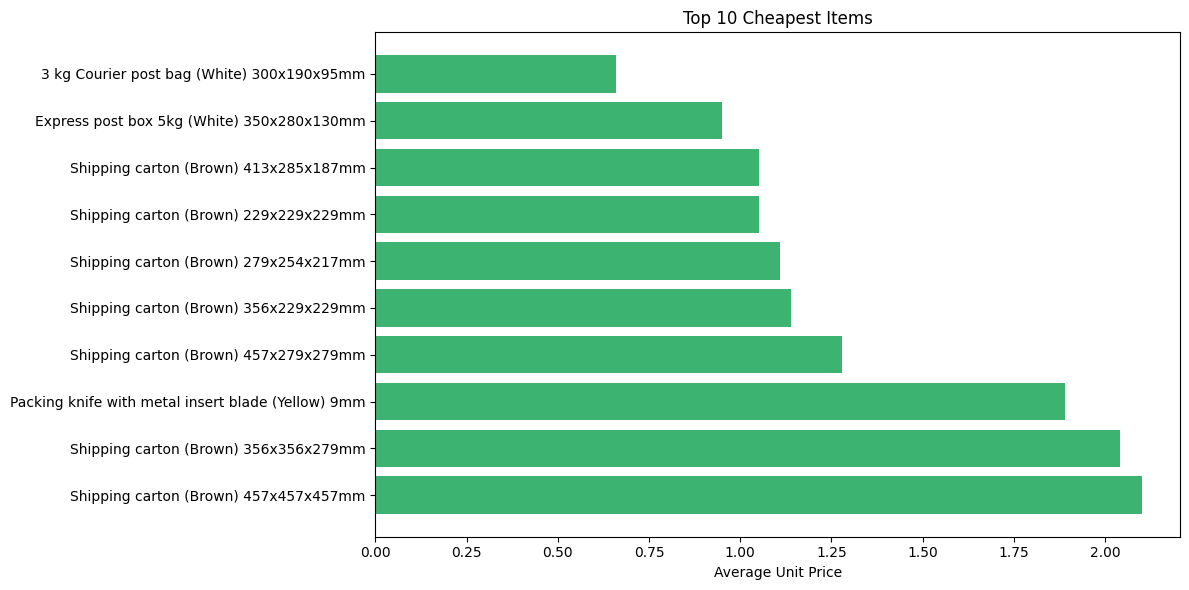

In [ ]:
plt.barh(top_10_cheap['StockItem_Name'], top_10_cheap['UnitPrice'], color='mediumseagreen')
plt.title('Top 10 Cheapest Items')
plt.xlabel('Average Unit Price')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

*Top 5 Most Prepaid Products*

<ipython-input-32-788955e6efed>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_prepaid_products.head(5), x='Prepayment_Count', y='StockItem_Name', palette='viridis')


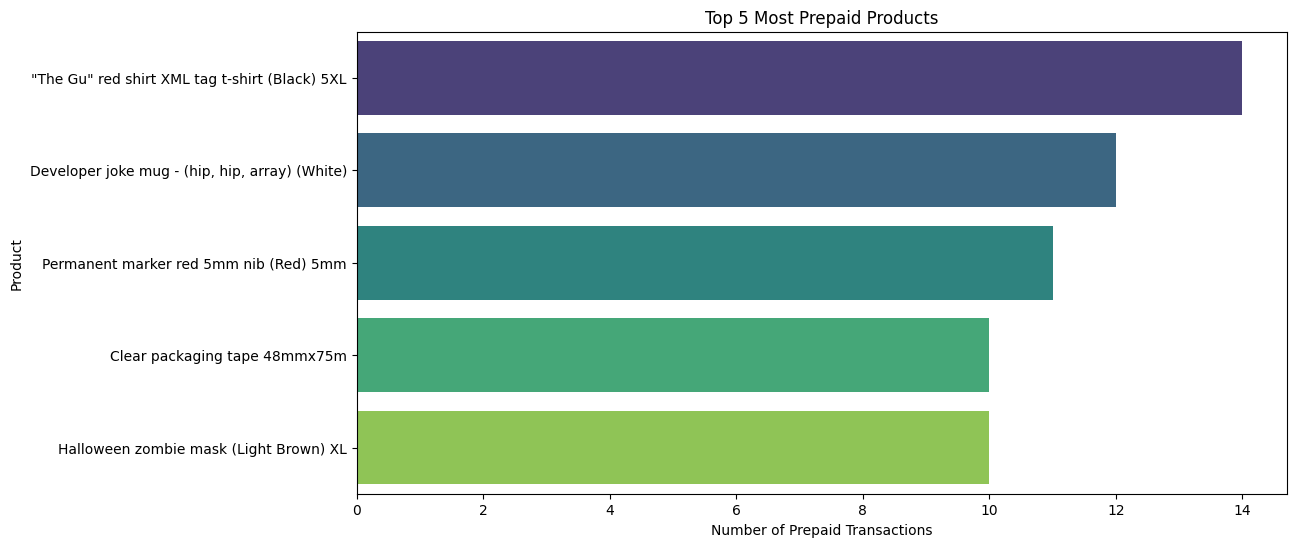

In [ ]:
# Filter only prepayment transactions
prepaid_df = df[df['Payment_Flag'] == 'Prepayment']

# Group by product and count how many times each was prepaid
most_prepaid_products = prepaid_df['StockItem_Name'].value_counts().reset_index()
most_prepaid_products.columns = ['StockItem_Name', 'Prepayment_Count']

sns.barplot(data=most_prepaid_products.head(5), x='Prepayment_Count', y='StockItem_Name', palette='viridis')
plt.title("Top 5 Most Prepaid Products")
plt.xlabel("Number of Prepaid Transactions")
plt.ylabel("Product")
plt.show()

Top Customers by Revenue

In [ ]:
top_customers = df.groupby('Customer')['Line_Revenue'].sum().sort_values(ascending=False)

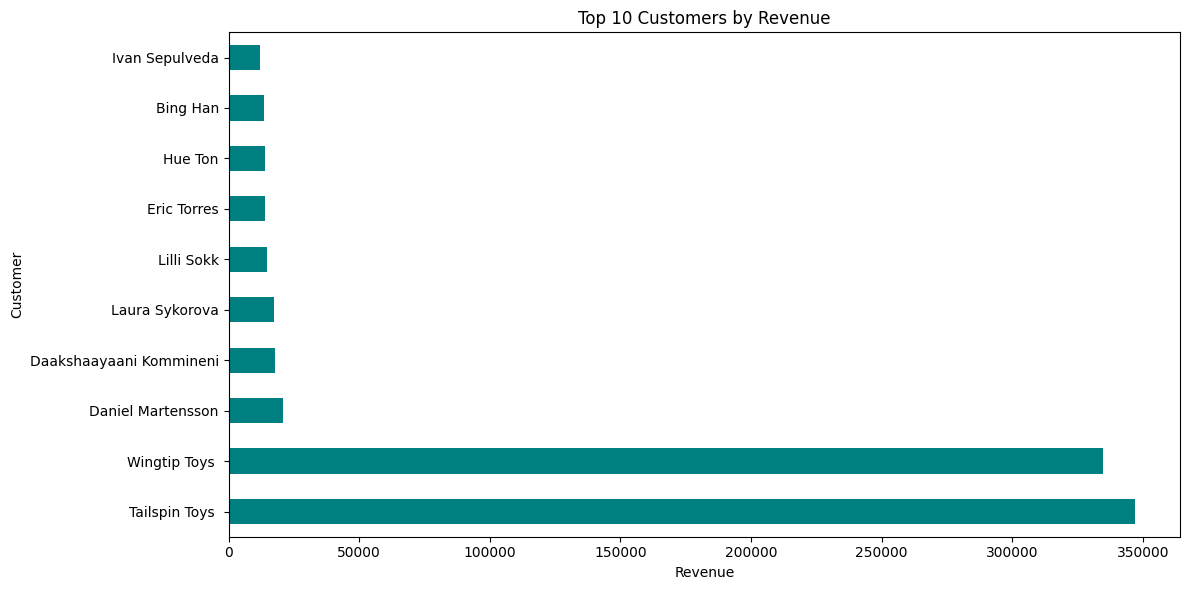

In [ ]:
top_customers = df.groupby('Customer')['Line_Revenue'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='barh', title='Top 10 Customers by Revenue', color='teal')
plt.xlabel('Revenue')
plt.tight_layout()
plt.show()

customer value segmentation

In [ ]:
df['Total_Price'] = df['Quantity'] * df['UnitPrice']

In [ ]:
customer_revenue = df.groupby('Customer')['Total_Price'].sum().reset_index()
bins = [0, 1000, 5000, float('inf')]
labels = ['Low', 'Medium', 'High']
customer_revenue['Customer_Segment'] = pd.cut(customer_revenue['Total_Price'], bins=bins, labels=labels)
print("\nCustomer Segments by Revenue:")
print(customer_revenue['Customer_Segment'].value_counts())


Customer Segments by Revenue:
Customer_Segment
Medium    122
Low        62
High       53
Name: count, dtype: int64


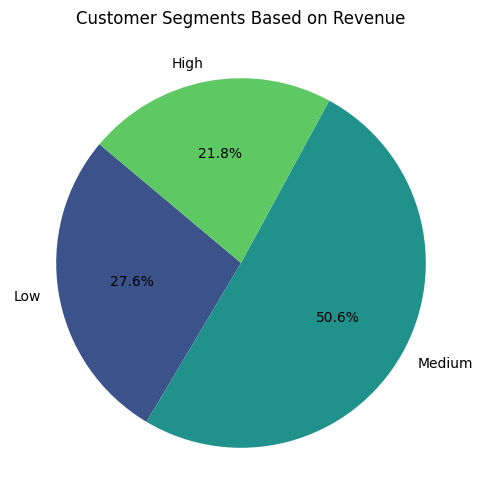

In [ ]:
segment_counts = customer_revenue['Customer_Segment'].value_counts().reindex(['Low', 'Medium', 'High'])
segment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', 3))
plt.title("Customer Segments Based on Revenue")
plt.ylabel('')
plt.show()

Top 10 Locations by Revenue

In [ ]:
top_locations = df.groupby('Location')['Line_Revenue'].sum().sort_values(ascending=False).head(10)

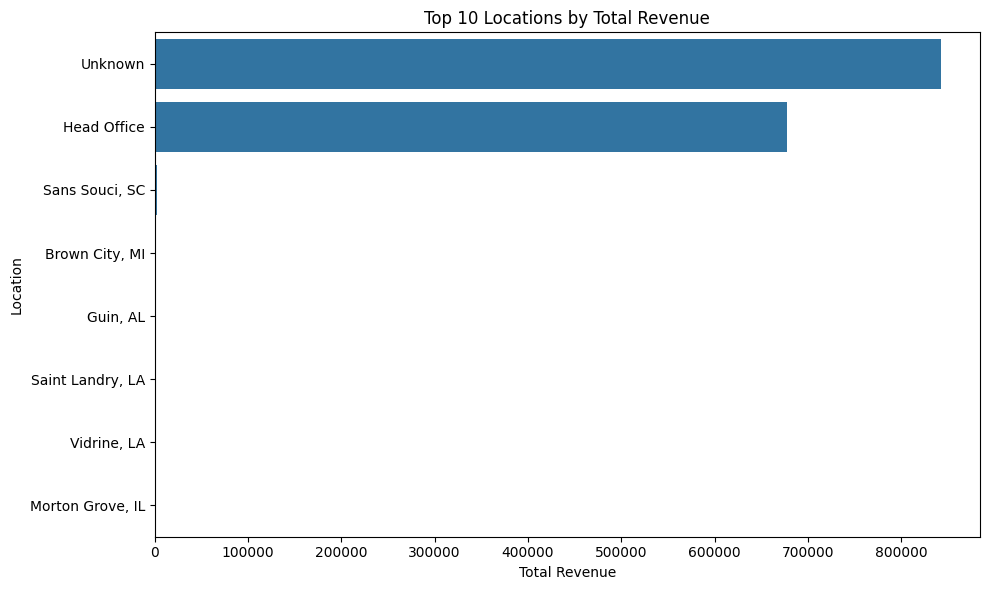

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title('Top 10 Locations by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

Average Order Value by State

<ipython-input-58-9b1874adc62c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_avg_order.values, y=state_avg_order.index, palette='coolwarm')
<ipython-input-58-9b1874adc62c>:8: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


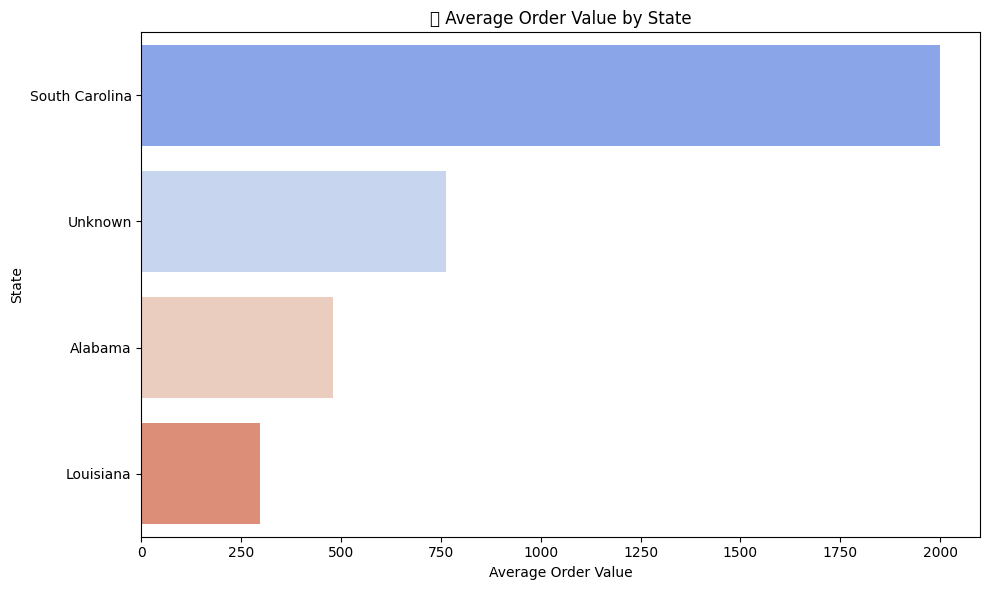

In [ ]:
state_avg_order = df.groupby('State')['Line_Revenue'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=state_avg_order.values, y=state_avg_order.index, palette='coolwarm')
plt.title('Average Order Value by State')
plt.xlabel('Average Order Value')
plt.ylabel('State')
plt.tight_layout()
plt.show()

Top 10 States by Revenue

# TAX Analysis

In [ ]:
# Total Tax Amount
total_tax = df['Tax_Amount'].sum()
print(f"Total Tax Amount: {total_tax}")

Total Tax Amount: 228298.0575


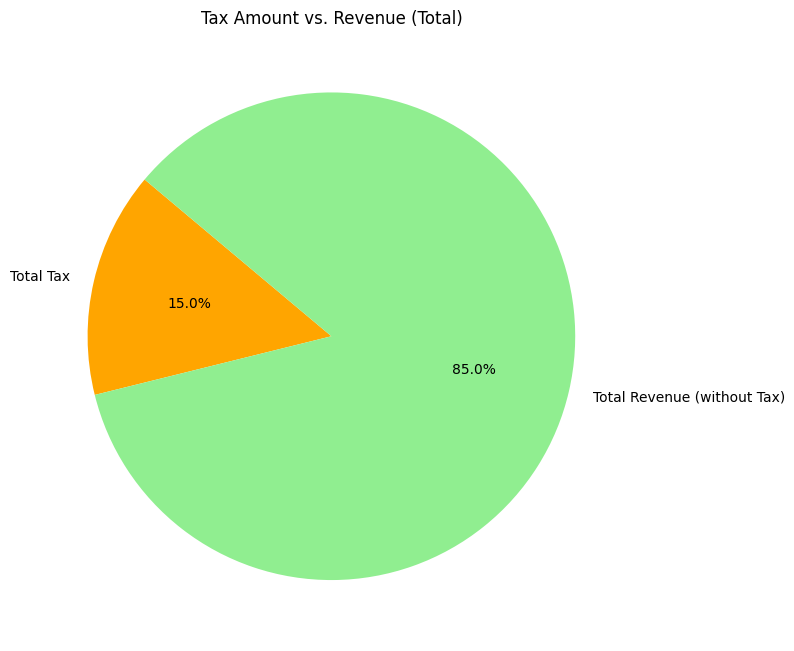

In [ ]:
# Total Tax vs Total Revenue
total_tax = df['Tax_Amount'].sum()
total_revenue = df['Line_Revenue'].sum()
sizes = [total_tax, total_revenue - total_tax]
labels = ['Total Tax', 'Total Revenue (without Tax)']

plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['orange', 'lightgreen'], startangle=140)
plt.title('Tax Amount vs. Revenue (Total)')
plt.tight_layout()
plt.show()

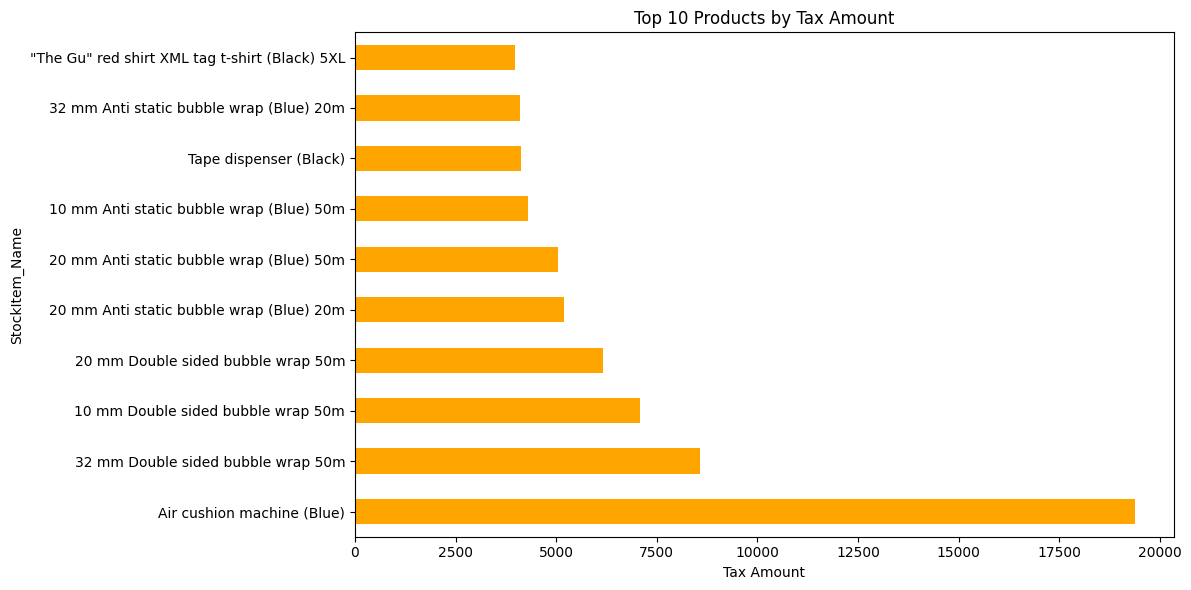

In [ ]:
# Tax Amount by Product
tax_by_product = df.groupby('StockItem_Name')['Tax_Amount'].sum().sort_values(ascending=False).head(10)
tax_by_product.plot(kind='barh', color='orange')
plt.title('Top 10 Products by Tax Amount')
plt.xlabel('Tax Amount')
plt.tight_layout()
plt.show()

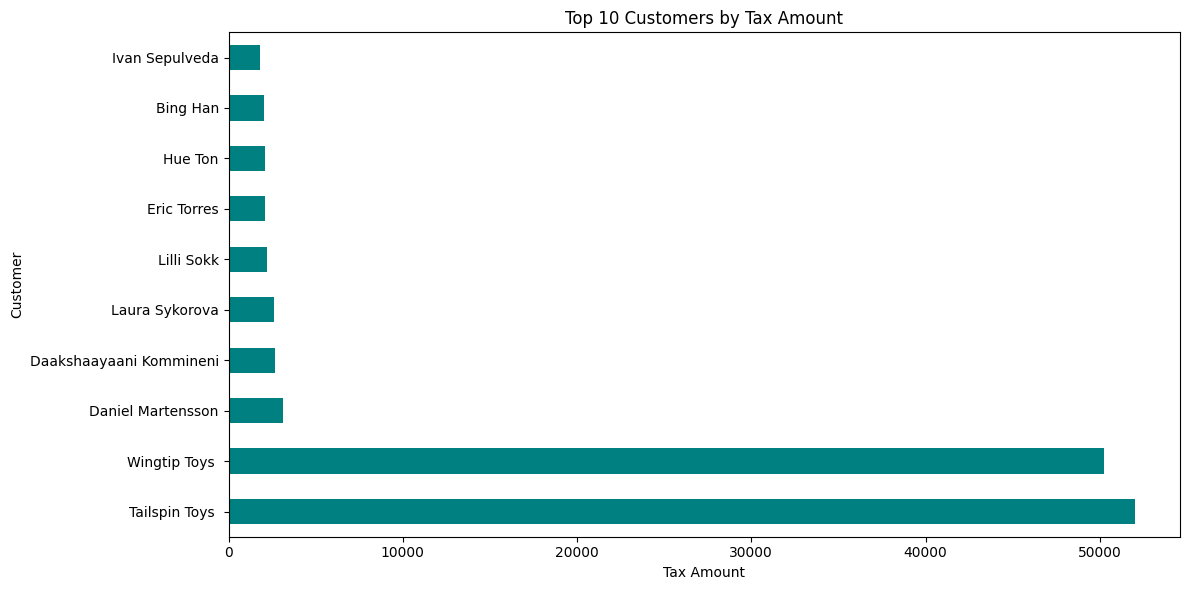

In [ ]:
# Tax Amount by Customer
tax_by_customer = df.groupby('Customer')['Tax_Amount'].sum().sort_values(ascending=False).head(10)
tax_by_customer.plot(kind='barh', color='teal')
plt.title('Top 10 Customers by Tax Amount')
plt.xlabel('Tax Amount')
plt.tight_layout()
plt.show()
